# Car Price Prediction


### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [2]:
ls

Applications/
Binance Coin - Historic data.csv
CarPrice_Assignment.csv
Cisco Packet Tracer 8.0.0/
Data Analysis.ipynb
Data Dictionary - carprices.xlsx
Desktop/
Documents/
Downloads/
FTP Protocol command.ipynb
File_Formats.ipynb
Heart_Disease_Prediction.csv
IBM API-Copy1.ipynb
IBM API.ipynb
IBM_HTTP.ipynb
Java unit 2.txt
LASSO Regression (L1 Regularization).ipynb
Library/
ML EDA Regression.ipynb
Mini Project.ipynb
Movies/
Music/
Numpy.ipynb
Pandas.ipynb
Pictures/
Public/
PycharmProjects/
SCAAI_TASK_SOLUTION.ipynb
SCAAI_Task.ipynb
SIT/
Socket Programming.ipynb
TERM_PROGRAM=Apple_Terminal
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
Untitled4.ipynb
Vodafone 17-9-21.ipynb
Web Scrapping.ipynb
ab
copy
copy_file.txt
dest.txt
dog.jpg
f3.sh
f7.sh
file1.txt
file2.txt
git/
git-test/
hi.sh
hi.txt
image.png
ja/
kk
lecture3_car_price_prediction.ipynb
lecture4_car_price_prediction.ipynb
lecture6_predicting-heart-disease-with-knn-and-logistic regression.ipynb
mysql
new_sample.xml
ol


In [3]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
cars.shape

(205, 26)

In [5]:
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
cars['car_ID'] = cars['car_ID'].astype('O')
cars['car_ID'].dtype

dtype('O')

In [7]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car_ID,205,205,205,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symboling,205,NaN,NaN,NaN,0.834146,1.24531,-2,0,1,2,3
CarName,205,147,toyota corona,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltype,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumber,205,2,four,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheel,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,205,NaN,NaN,NaN,98.7566,6.02178,86.6,94.5,97,102.4,120.9


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    object 
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
count=0
for car in list(cars['CarName'].unique()):
    count=count+1
    print(car)

alfa-romero giulia
alfa-romero stelvio
alfa-romero Quadrifoglio
audi 100 ls
audi 100ls
audi fox
audi 5000
audi 4000
audi 5000s (diesel)
bmw 320i
bmw x1
bmw x3
bmw z4
bmw x4
bmw x5
chevrolet impala
chevrolet monte carlo
chevrolet vega 2300
dodge rampage
dodge challenger se
dodge d200
dodge monaco (sw)
dodge colt hardtop
dodge colt (sw)
dodge coronet custom
dodge dart custom
dodge coronet custom (sw)
honda civic
honda civic cvcc
honda accord cvcc
honda accord lx
honda civic 1500 gl
honda accord
honda civic 1300
honda prelude
honda civic (auto)
isuzu MU-X
isuzu D-Max 
isuzu D-Max V-Cross
jaguar xj
jaguar xf
jaguar xk
maxda rx3
maxda glc deluxe
mazda rx2 coupe
mazda rx-4
mazda glc deluxe
mazda 626
mazda glc
mazda rx-7 gs
mazda glc 4
mazda glc custom l
mazda glc custom
buick electra 225 custom
buick century luxus (sw)
buick century
buick skyhawk
buick opel isuzu deluxe
buick skylark
buick century special
buick regal sport coupe (turbo)
mercury cougar
mitsubishi mirage
mitsubishi lancer
mits

In [10]:
count

147

In [11]:
cars['CarName'].isna().value_counts()

False    205
Name: CarName, dtype: int64

### crosstab() function: This method is used to compute a simple cross-tabulation of two (or more) factors. By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.
### Syntax: pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name=’All’, dropna=True, normalize=False)
### index : array-like, Series, or list of arrays/Series, Values to group by in the rows. columns : array-like, Series, or list of arrays/Series, Values to group by in the columns


In [12]:
# Crosstab between categorical variables
pd.crosstab(cars['carbody'],cars['aspiration'])

aspiration,std,turbo
carbody,,
convertible,6,0
hardtop,7,1
hatchback,57,13
sedan,78,18
wagon,20,5


In [13]:
# Find distribution between carbody,enginelocation, drivewheel,  enginelocation, enginetype 
pd.crosstab(cars['enginelocation'],cars['drivewheel'])

drivewheel,4wd,fwd,rwd
enginelocation,,,
front,9,120,73
rear,0,0,3


In [14]:
pd.crosstab(cars['enginelocation'],cars['carbody'])

carbody,convertible,hardtop,hatchback,sedan,wagon
enginelocation,,,,,
front,5,6,70,96,25
rear,1,2,0,0,0


In [15]:
pd.crosstab(cars['enginetype'],cars['enginelocation'])

enginelocation,front,rear
enginetype,,
dohc,12,0
dohcv,1,0
l,12,0
ohc,148,0
ohcf,12,3
ohcv,13,0
rotor,4,0


In [16]:
# Distribution of values in categorical variables
cars['carbody'].value_counts(normalize = False)

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [17]:
#Normalized values
cars['carbody'].value_counts(normalize = True)

sedan          0.468293
hatchback      0.341463
wagon          0.121951
hardtop        0.039024
convertible    0.029268
Name: carbody, dtype: float64

In [18]:
# Operations on cotinuous variables
cars['enginesize'].min(),cars['enginesize'].max()

(61, 326)

In [19]:
# Find average price
cars['price'].mean()

13276.710570731706

In [20]:
# Find mode of enginelocation
cars['enginelocation'].mode()

0    front
dtype: object

In [21]:
cars['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

### DataFrame.loc[] : a method that takes only index labels and returns row or dataframe if the index label exists in the caller data frame.

In [22]:
# Subsetting the dataframe. (SQL like operations)
# List all convertible CarNames 
cars.loc[cars['carbody'] == 'convertible'][['CarName','price','citympg','drivewheel']]

,CarName,price,citympg,drivewheel
0,alfa-romero giulia,13495.0,21,rwd
1,alfa-romero stelvio,16500.0,21,rwd
72,buick skylark,35056.0,16,rwd
128,porsche boxter,37028.0,17,rwd
172,toyota cressida,17669.0,24,rwd
189,vw dasher,11595.0,24,fwd


In [23]:
# List the convertibles who have highwaympg > 25
cars.loc[(cars['carbody'] == 'convertible') & (cars['highwaympg'] > 25)][['CarName','highwaympg','price']]

,CarName,highwaympg,price
0,alfa-romero giulia,27,13495.0
1,alfa-romero stelvio,27,16500.0
172,toyota cressida,30,17669.0
189,vw dasher,29,11595.0


In [24]:
cars.iloc[0:5,1:5]

,symboling,CarName,fueltype,aspiration
0,3,alfa-romero giulia,gas,std
1,3,alfa-romero stelvio,gas,std
2,1,alfa-romero Quadrifoglio,gas,std
3,2,audi 100 ls,gas,std
4,2,audi 100ls,gas,std


In [25]:
# Find the average price of 4wd convertible cars who have citympg > 20
cars.loc[(cars['carbody']=='convertible') & (cars['drivewheel'] == '4wd') & (cars['citympg'] >20)]['price']

Series([], Name: price, dtype: float64)

#### This shows there are no such values available

In [26]:
cars.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [27]:
# Aggregate operations
# Find the count of cars per carbody type, per engine location type, drivewheel type
cars[['carbody','enginelocation','drivewheel','car_ID']].groupby(['carbody','enginelocation','drivewheel']).count()

car_ID
carbody     enginelocation drivewheel        
convertible front          fwd              1
                           rwd              4
            rear           rwd              1
hardtop     front          fwd              1
                           rwd              5
            rear           rwd              2
hatchback   front          4wd              2
                           fwd             49
                           rwd             19
sedan       front          4wd              3
                           fwd             57
                           rwd             36
wagon       front          4wd              4
                           fwd             12
                           rwd              9

In [28]:
# Find the avg price per carbody type, per engine location type
cars[['carbody','enginelocation','price']].groupby(['carbody', 'enginelocation']).mean()

price
carbody     enginelocation              
convertible front           18863.000000
            rear            37028.000000
hardtop     front           18518.666667
            rear            33278.000000
hatchback   front           10376.652386
sedan       front           14344.270833
wagon       front           12371.960000

### Step 2 : Data Cleaning and Preparation

In [29]:
def test_func(x):
    return x.split(' ')[0]

In [30]:
test_func('alfa-romero giulia')

'alfa-romero'

In [31]:
#Splitting company name from CarName column, inserting new column named CompanyName and dropping the CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [32]:
cars['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
maxda           2
vw              2
renault         2
toyouta         1
Nissan          1
porcshce        1
vokswagen       1
mercury         1
Name: CompanyName, dtype: int64

In [33]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [34]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [35]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [36]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Step 3: Visualizing the data


### The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions. It represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. 

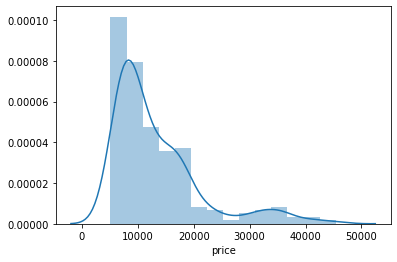

In [37]:
sns.distplot(cars['price'])

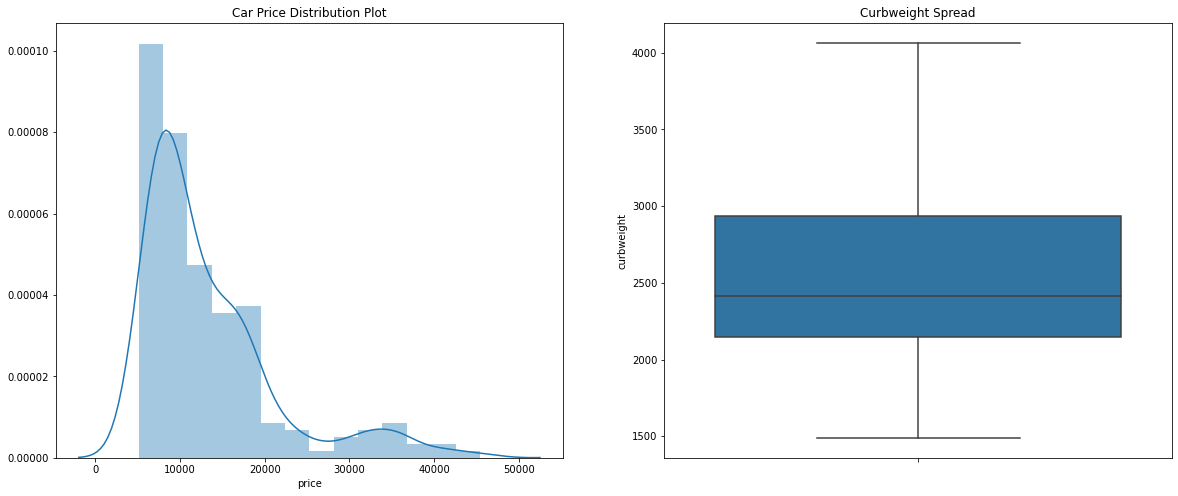

In [38]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Curbweight Spread')
sns.boxplot(y=cars.curbweight)

plt.show()

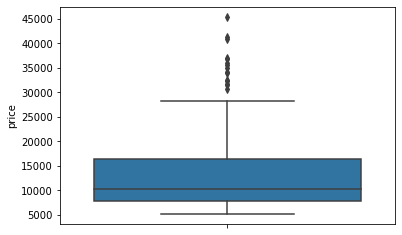

In [39]:
sns.boxplot(y=cars.price)

In [40]:
cars['price'].median()

10295.0

In [41]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


#### Inference :

1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

#### Step 3.1 : Visualising Categorical Data

    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel

#### pyplot.subplot() : Subplots mean a group of smaller axes (where each axis is a plot) that can exist together within a single figure. Think of a figure as a canvas that holds multiple plots.

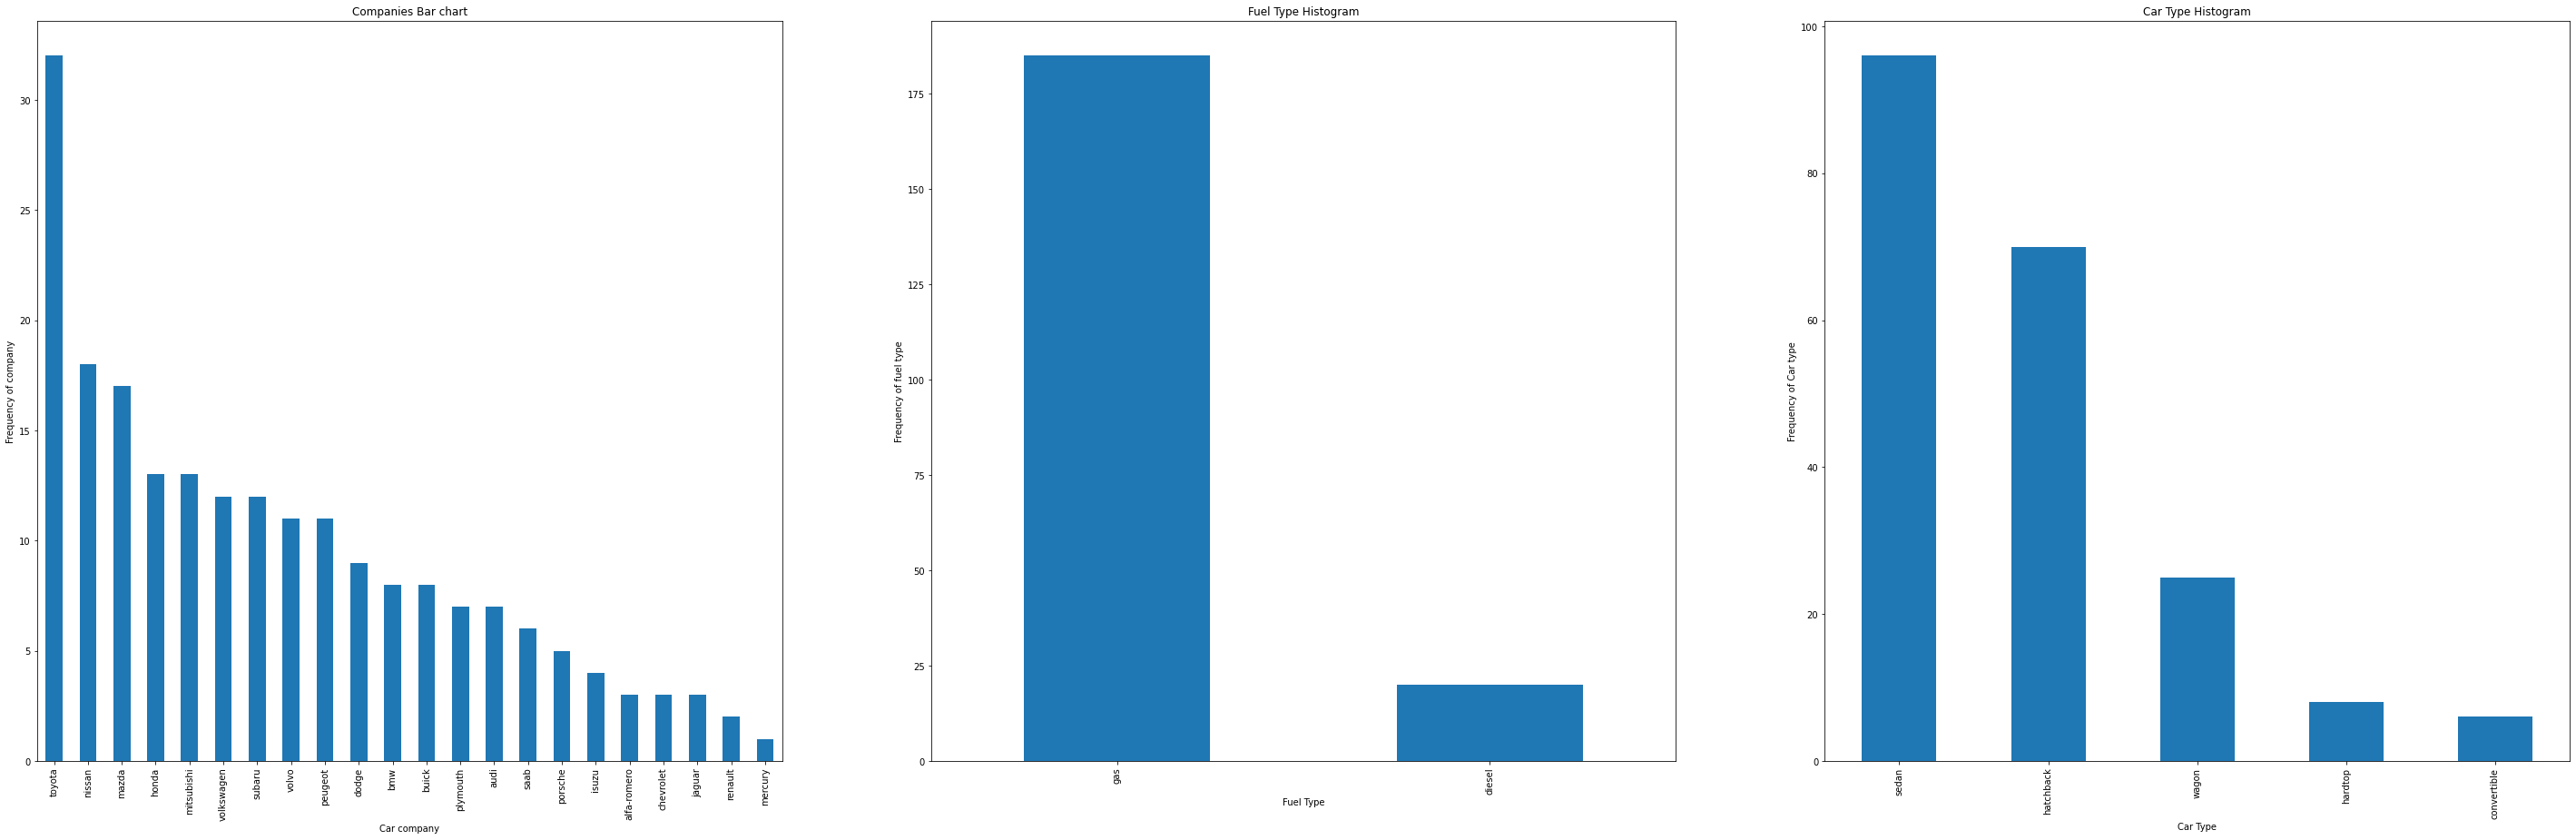

In [42]:
plt.figure(figsize=(50, 15))

plt.subplot(1,3,1)
plt1 = cars['CompanyName'].value_counts().plot(kind='bar')
plt.title('Companies Bar chart')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

#### Inference :

1. `Toyota` seemed to be favored car company.
2. Number of `gas` fueled cars are more than `diesel`.
3. `sedan` is the top car type prefered.

#### Domain Knowlege
“symboling”, corresponds to the insurance risk level of a car. Cars are initially assigned a risk factor symbol associated with their price. Then, if an automobile is riskier, this symbol is adjusted by moving it up the scale.
A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

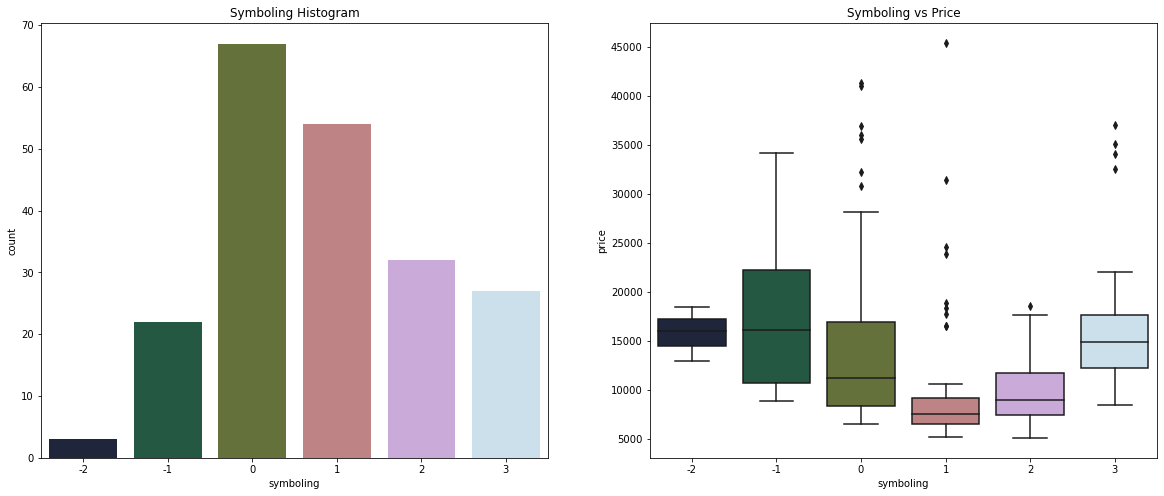

In [43]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

#### Inference :

1. It seems that the symboling with `0` and `1` values have high number of rows (i.e. They are most sold.)
2. The cars with `-1` symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with `3` value has the price range similar to `-2` value. There is a dip in price at symboling `1`.

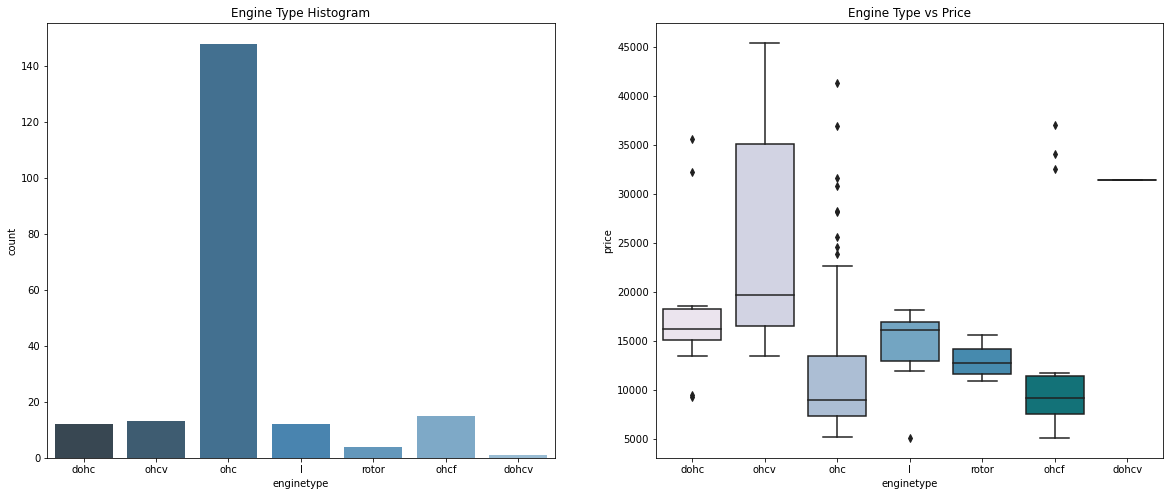

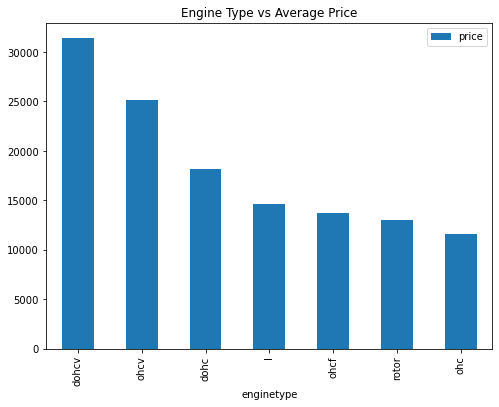

In [44]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


#### Inference :

1. `ohc` Engine type seems to be most favored type.
2. `ohcv` has the highest price range (While `dohcv` has only one row), `ohc` and `ohcf` have the low price range.

<Figure size 1800x432 with 0 Axes>

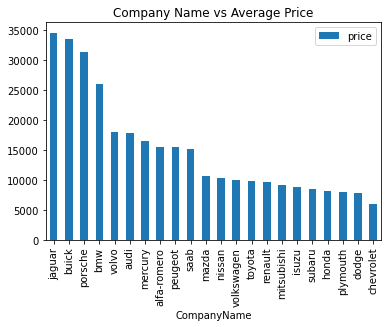

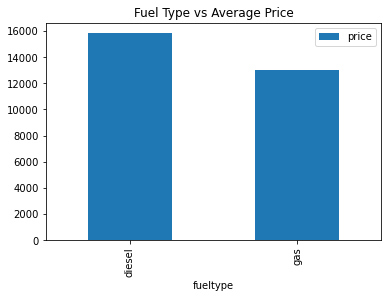

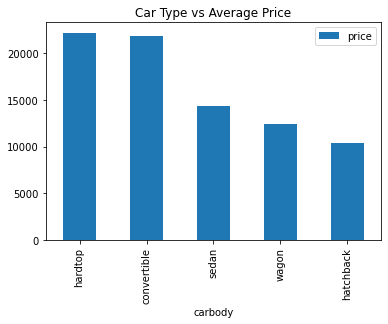

In [45]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Inference :

1. `Jaguar` and `Buick` seem to have highest average price.
2. `diesel` has higher average price than  gas.
3. `hardtop` and `convertible` have higher average price.

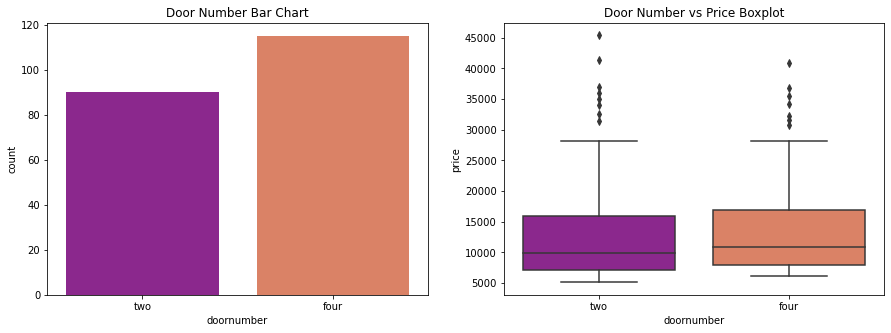

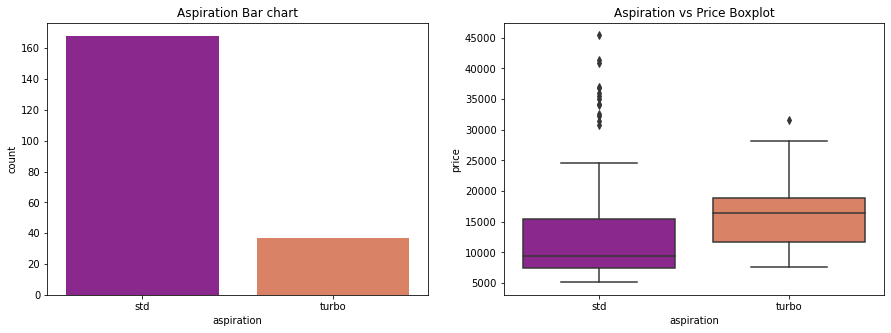

In [46]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Bar Chart')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price Boxplot')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Bar chart')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price Boxplot')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()


#### Inference :

1. `doornumber` variable is not affacting the price much. There is no significant difference between the categories in it.
2. It seems aspiration with `turbo` have higher price range than the `std`(though it has some high values outside the whiskers.)

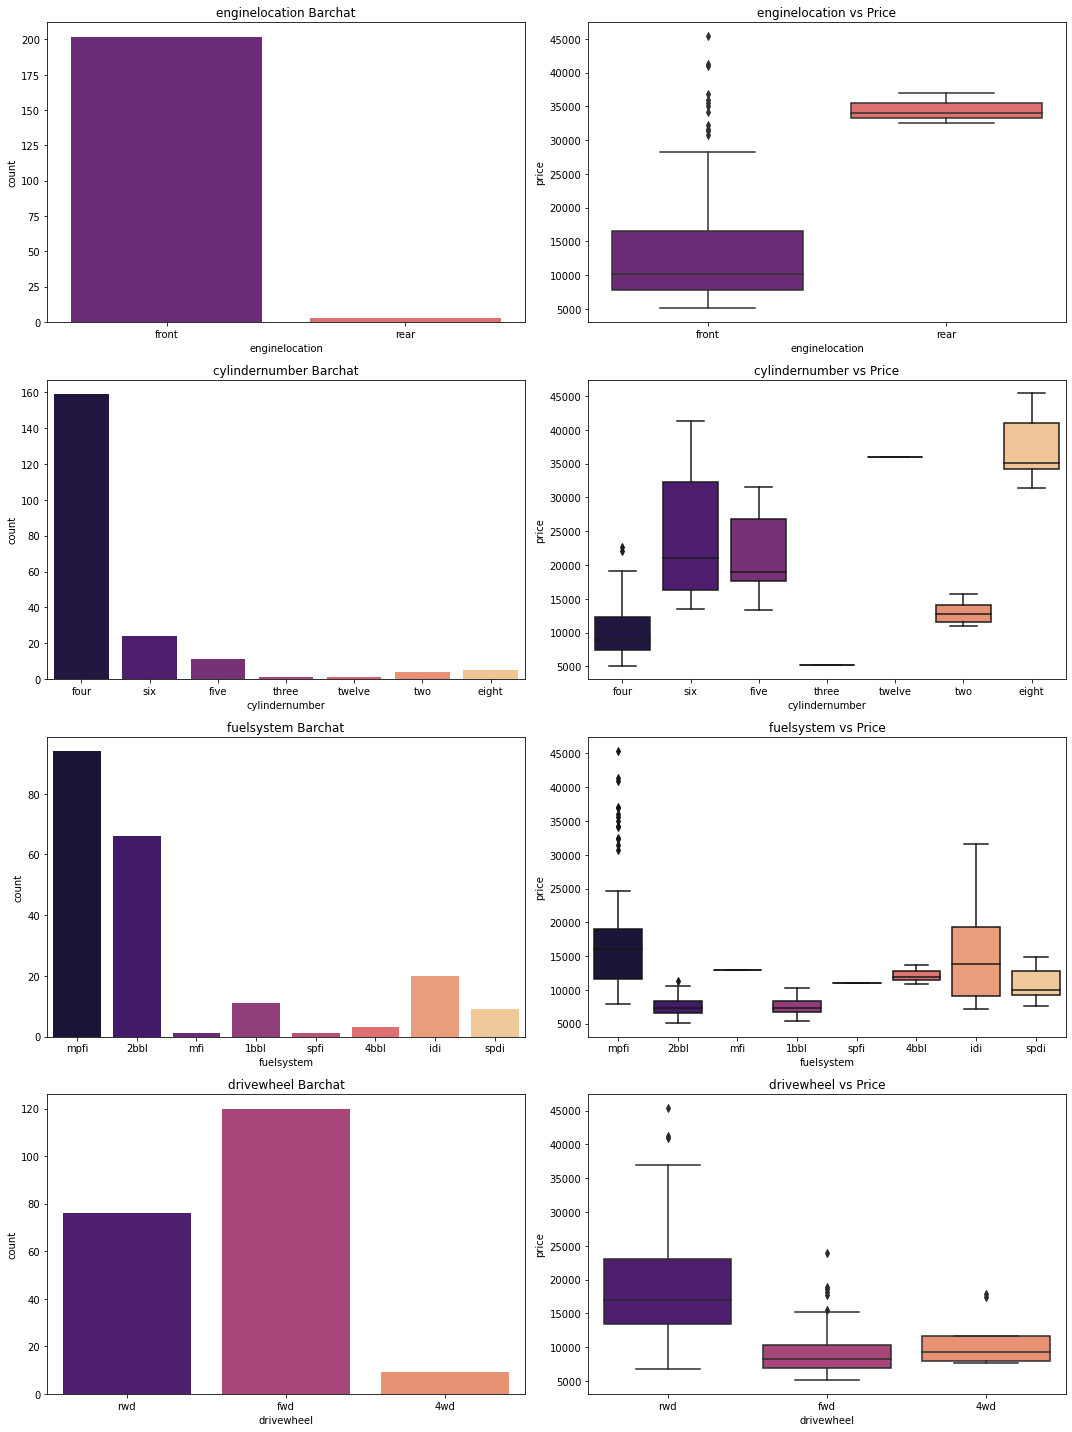

In [47]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Barchat')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

#### Inference :

1. Very few datapoints for `enginelocation` categories to make an inference.
2. Most common number of cylinders are `four`, `six` and `five`. Though `eight` cylinders have the highest price range.
3. `mpfi` and `2bbl` are most common type of fuel systems. `mpfi` and `idi` having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer `rwd` drivewheel.

#### Step 3.2 : Visualising numerical data

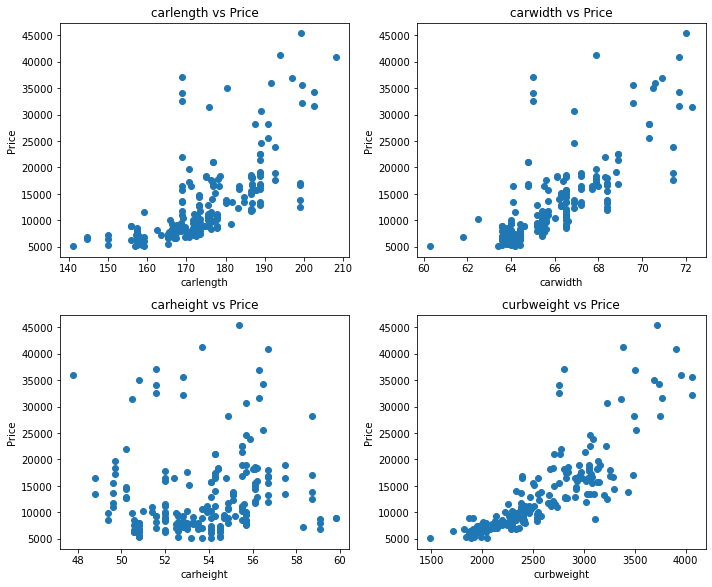

In [48]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

#### Inference :

1. `carwidth`, `carlength` and `curbweight` seems to have a poitive correlation with `price`. 
2. `carheight` doesn't show any significant trend with price.

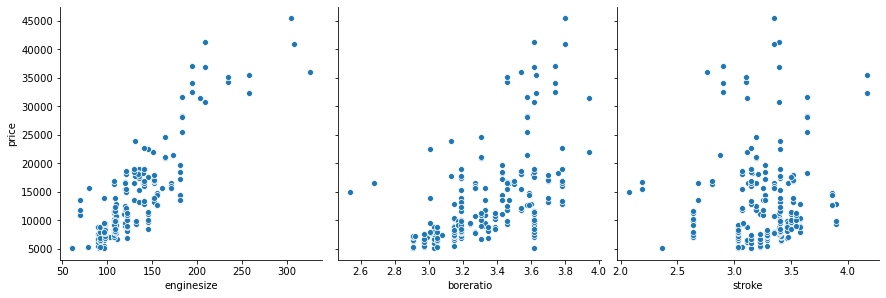

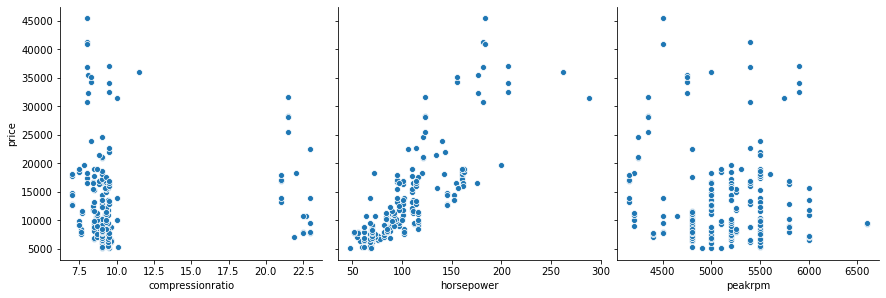

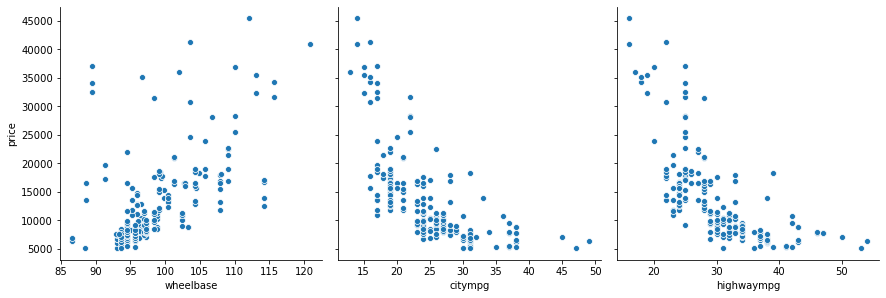

In [49]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

#### Inference :

1. `enginesize`, `boreratio`, `horsepower`, `wheelbase` - seem to have a significant positive correlation with price.
2. `citympg`, `highwaympg` - seem to have a significant negative correlation with price.

In [50]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

### Step 4 : Deriving new features

In [51]:
#Fuel economy (weighted sum)
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [52]:
#Binning the Car Companies based on avg prices of each Company.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']

#cut is only applicable on continuos variable, it breaks the data into bins
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [53]:
cars['carsrange'].value_counts()

Budget     95
Medium     86
Highend    24
Name: carsrange, dtype: int64

In [54]:
cars[['fueleconomy']].describe().T

,count,mean,std,min,25%,50%,75%,max
fueleconomy,205.0,27.70878,6.649183,14.8,21.95,26.7,31.8,51.25


In [55]:
#Creating a new column based on the fueleconomy and deciding which car is high or low performance

cars['carsperf'] = cars['fueleconomy'].apply(lambda x: 'Low' if x<28 else 'High')  #apply this function to each row of fueleconomy column
cars['carsperf'].value_counts()

Low     112
High     93
Name: carsperf, dtype: int64

In [56]:
cars['carsrange'].value_counts()

Budget     95
Medium     86
Highend    24
Name: carsrange, dtype: int64

### Step 5 : Bivariate Analysis

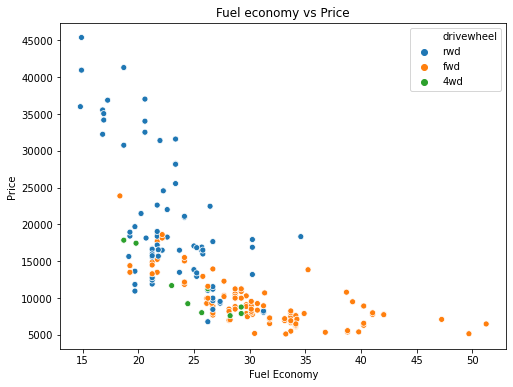

<Figure size 432x288 with 0 Axes>

In [57]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

#### Inference :

1. `fueleconomy` has an obvios `negative correlation` with price and is significant.

<Figure size 1800x432 with 0 Axes>

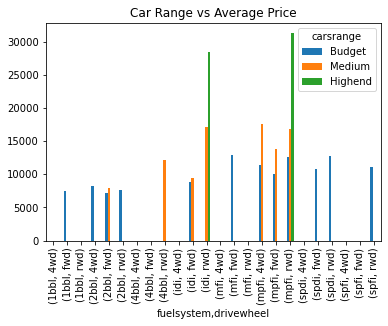

In [58]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

#### Inference :

1. High ranged cars prefer `rwd` drivewheel with `idi` or `mpfi` fuelsystem.

# Feature selection

### List of significant variables after Visual analysis :

    - Car Range 
    - Engine Type 
    - Fuel type 
    - Car Body 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy 

In [59]:
# Find correlation between cotninuos variables
num_cols = []
# cat_cols = []
for col in cars.columns:
    if cars[col].dtype in ['float64']:
        num_cols.append(col)
    else:
        pass
num_cols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'fueleconomy']

In [60]:
corr =cars[num_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,fueleconomy
wheelbase,1.000000,0.874587,0.795144,0.589435,0.488750,0.160959,0.249786,-0.508136
carlength,0.874587,1.000000,0.841118,0.491029,0.606454,0.129533,0.158414,-0.691472
carwidth,0.795144,0.841118,1.000000,0.279210,0.559150,0.182942,0.181129,-0.663419
carheight,0.589435,0.491029,0.279210,1.000000,0.171071,-0.055307,0.261214,-0.076356
boreratio,0.488750,0.606454,0.559150,0.171071,1.000000,-0.055909,0.005197,-0.589898
stroke,0.160959,0.129533,0.182942,-0.055307,-0.055909,1.000000,0.186110,-0.043281
compressionratio,0.249786,0.158414,0.181129,0.261214,0.005197,0.186110,1.000000,0.299310
fueleconomy,-0.508136,-0.691472,-0.663419,-0.076356,-0.589898,-0.043281,0.299310,1.000000


In [61]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','enginetype',
                'wheelbase','curbweight', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,enginetype,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,dohc,88.6,2548,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,dohc,88.6,2548,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,ohcv,94.5,2823,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,ohc,99.8,2337,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,ohc,99.4,2824,five,136,3.19,115,19.80,176.6,66.4,Medium


#### To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

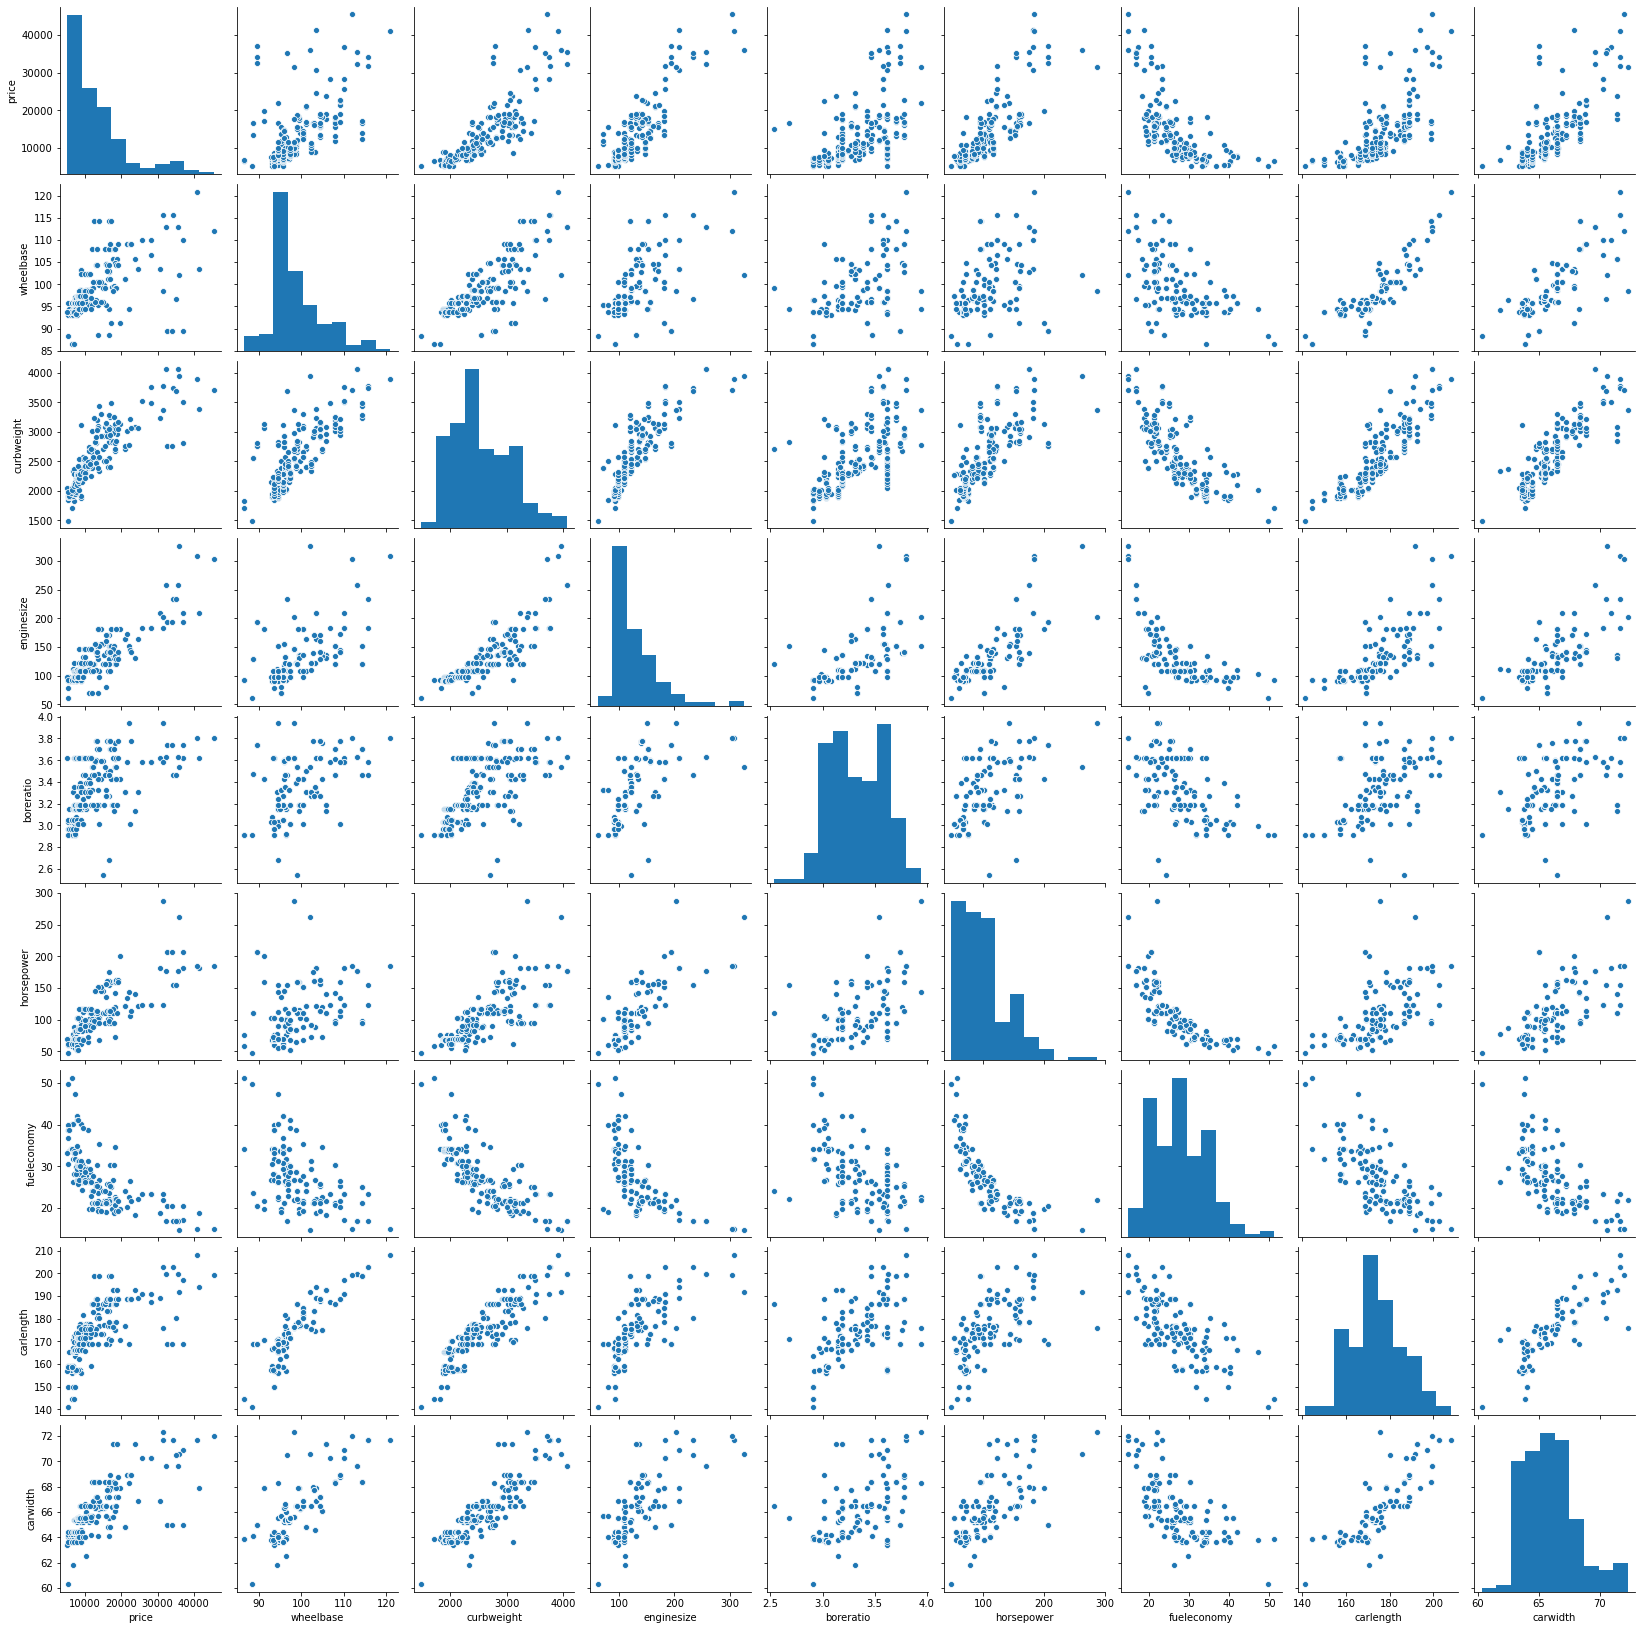

In [62]:
sns.pairplot(cars_lr)
plt.show()

# Feature engineering & transformation

### Step 6 : Dummy Variables

In [63]:
cars_lr['carsrange'].unique()

[Medium, Highend, Budget]
Categories (3, object): [Budget < Medium < Highend]

In [64]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True,prefix=x,prefix_sep='_')
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [65]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [66]:
cars_lr.shape

(205, 31)

### Step 7 : Train-Test Split and feature scaling

In [67]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [69]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [70]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


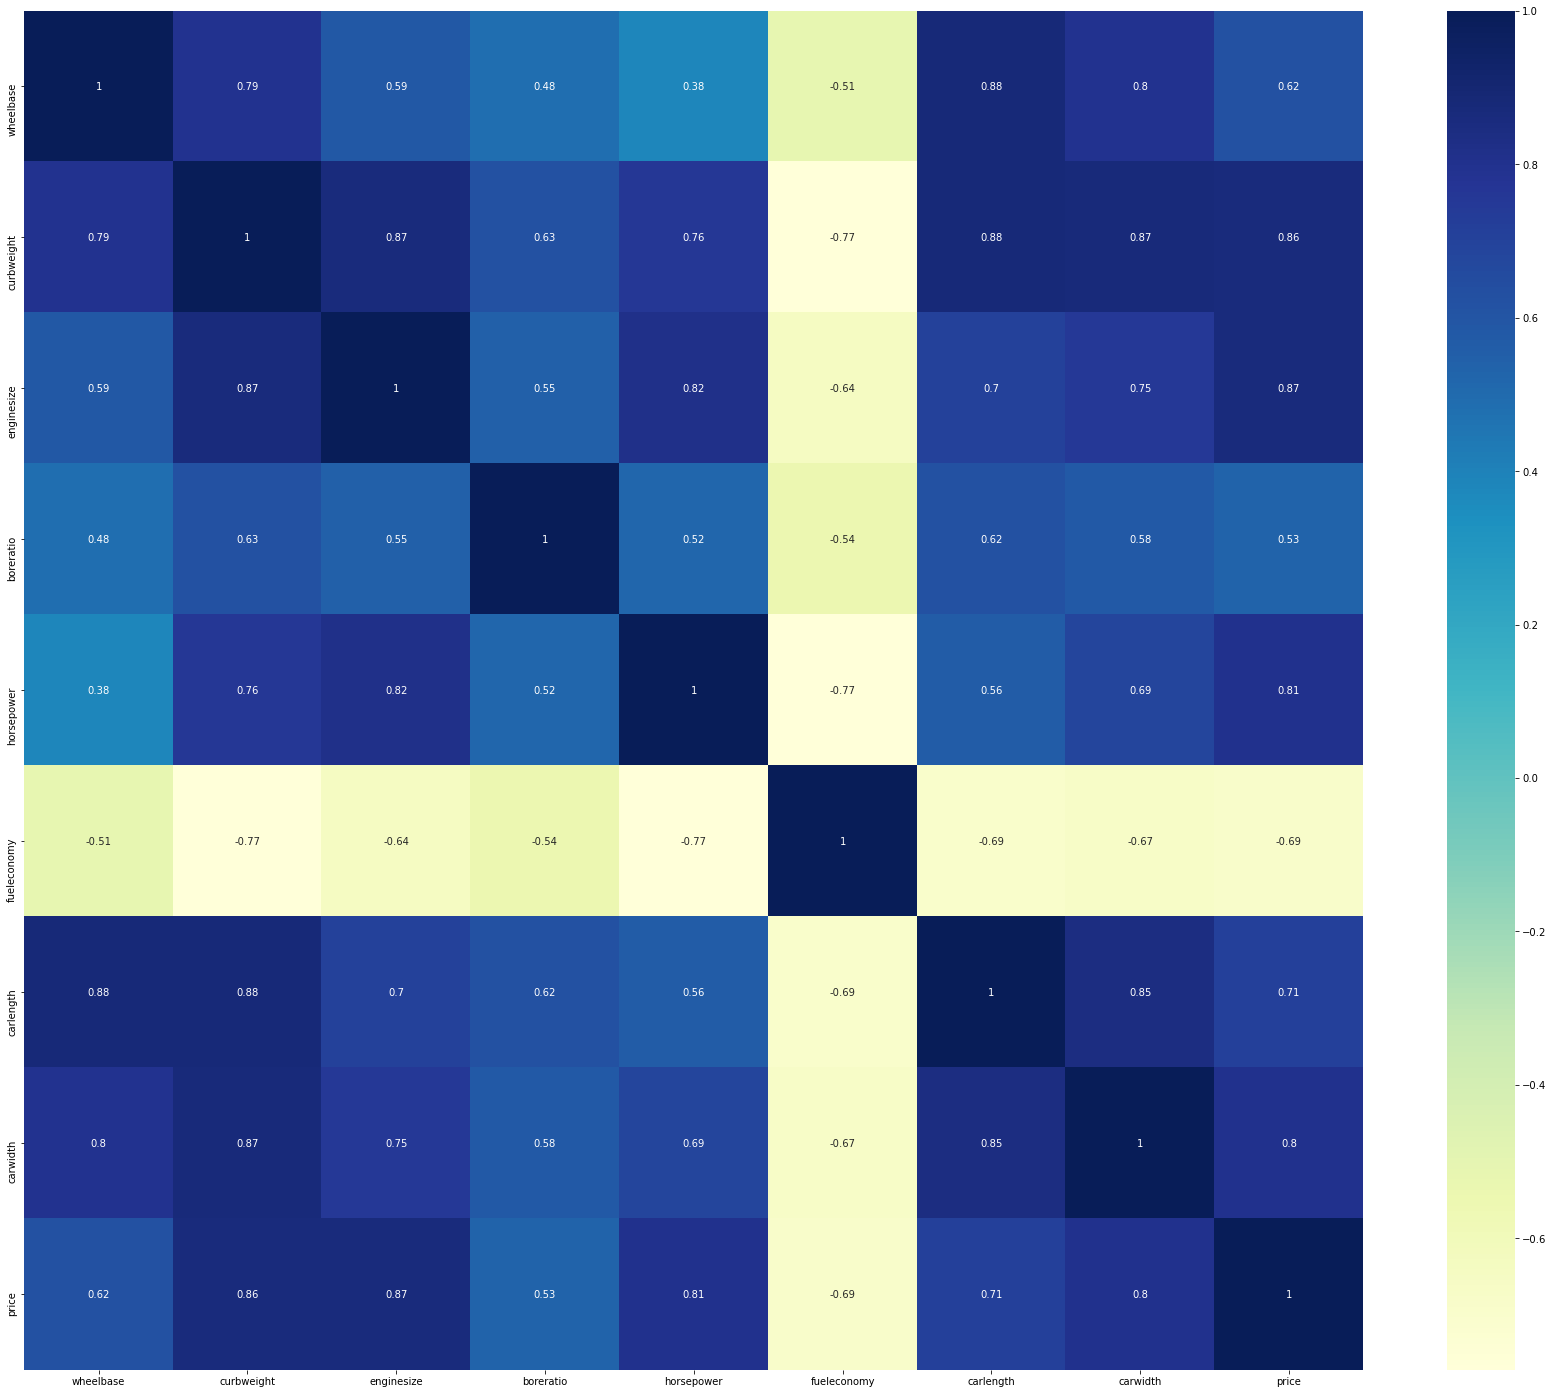

In [71]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
corr_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
sns.heatmap(df_train[corr_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

Highly correlated variables to price are - `curbweight`, `enginesize`, `horsepower`,`carwidth`

In [72]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [73]:
df_train.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
122,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


### Step 8 : Model Building

#### RFE:
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [74]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
X_train.dtypes;

In [76]:
X_train.head(2)

,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
122,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [77]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [78]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('fueltype_gas', False, 17),
 ('aspiration_turbo', False, 18),
 ('carbody_hardtop', False, 2),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 16),
 ('drivewheel_rwd', False, 15),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 19),
 ('enginetype_ohc', False, 7),
 ('enginetype_ohcf', False, 8),
 ('enginetype_ohcv', False, 9),
 ('enginetype_rotor', False, 21),
 ('cylindernumber_five', False, 6),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 5),
 ('cylindernumber_three', False, 14),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 20),
 ('carsrange_Medium', False, 12),
 ('carsrange_Highend', True, 1)]

In [79]:
#rfe.support_ : an array that indicates whether or not a feature was selected.
rfe.support_

array([False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True])

In [80]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'cylindernumber_twelve', 'carsrange_Highend'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [81]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,cylindernumber_twelve,carsrange_Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


#### OSL 
Ordinary least squares, or linear least squares, estimates the parameters in a regression model by minimizing the sum of the squared residuals. This method draws a line through the data points that minimizes the sum of the squared differences between the observed values and the corresponding fitted values.

In [82]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant - X is an intercept, it is a convention
    lm = sm.OLS(y,X).fit() # fitting the model - OLS: Ordinary Least square
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### MODEL 1

In [83]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           1.29e-70
Time:                        17:39:50   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

p-vale of `cylindernumber_twelve` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [84]:
X_train_new = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

In [85]:
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,cylindernumber_twelve,carsrange_Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


#### MODEL 2

In [86]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           4.25e-71
Time:                        17:39:51   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0764      0.04

In [87]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

#### MODEL 3

In [88]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           7.85e-72
Time:                        17:39:51   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0305      0.02

In [89]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,carbody_sedan,6.07
4,carbody_hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,carbody_wagon,3.58
8,carsrange_Highend,1.63
7,enginetype_dohcv,1.46


dropping `curbweight` because of high VIF value. (shows that curbweight has high multicollinearity.)

In [90]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

#### MODEL 4


In [91]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           4.70e-70
Time:                        17:39:51   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0319      0.02

In [92]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.89
4,carbody_sedan,6.06
3,carbody_hatchback,5.54
5,carbody_wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,carsrange_Highend,1.56
6,enginetype_dohcv,1.21


dropping `carbody_sedan` because of high VIF value.

In [93]:
X_train_new = X_train_new.drop(["carbody_sedan"], axis = 1)

#### MODEL 5

In [94]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           1.68e-69
Time:                        17:39:51   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0934      0.01

In [95]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,carsrange_Highend,1.55
3,carbody_hatchback,1.23
5,enginetype_dohcv,1.21
4,carbody_wagon,1.11


dropping `wagon` because of high p-value.

In [96]:
X_train_new = X_train_new.drop(["carbody_wagon"], axis = 1)

#### MODEL 6

In [97]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           1.57e-70
Time:                        17:39:51   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0970      0.01

In [98]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,carsrange_Highend,1.53
4,enginetype_dohcv,1.21
3,carbody_hatchback,1.13


#### MODEL 7

In [99]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["enginetype_dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           1.04e-67
Time:                        17:39:51   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0824      0.01

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,carsrange_Highend,1.53
3,carbody_hatchback,1.10


#### Feature selection method : using T distribution

### Step 9 : Residual Analysis of Model

In [100]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

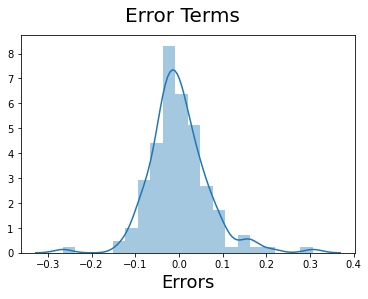

In [101]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

In [102]:
res_df = X_train_new.copy()
res_df['y_train'] = y_train
res_df['y_train_pred'] = y_train_price
res_df['Residual'] = y_train - y_train_price
res_df.head()

,const,horsepower,carwidth,carbody_hatchback,carsrange_Highend,y_train,y_train_pred,Residual
122,1.0,0.083333,0.291667,0,0,0.068818,0.069643,-0.000826
125,1.0,0.395833,0.666667,1,1,0.466890,0.593598,-0.126709
166,1.0,0.266667,0.308333,1,0,0.122110,0.115545,0.006564
1,1.0,0.262500,0.316667,0,0,0.314446,0.158405,0.156041
199,1.0,0.475000,0.575000,0,0,0.382131,0.354161,0.027970


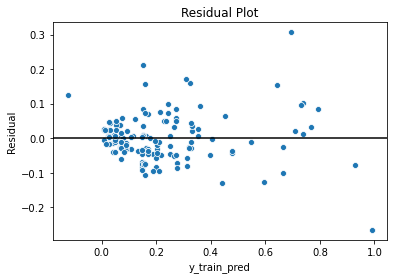

In [103]:
plt.title('Residual Plot')
sns.scatterplot(x=res_df['y_train_pred'], y= res_df['Residual'])
plt.axhline(y=0,color='black')

* The average of residual is centered around the zero and the distribution is random, so the assumption on the linear modeling seems to be fulfilled.

### Step 10 : Prediction and Evaluation

In [104]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [105]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [106]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [107]:
X_test_new.head(3)

,const,horsepower,carwidth,carbody_hatchback,carsrange_Highend
160,1.0,0.116129,0.200000,0,0
186,1.0,0.212903,0.315789,0,0
59,1.0,0.206452,0.421053,1,0


In [108]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [109]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8614595209022035

Text(0, 0.5, 'y_pred')

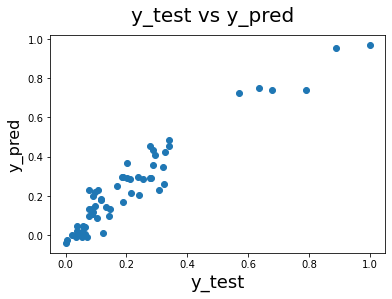

In [110]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

#### Evaluation of the model using Statistics

In [111]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           1.04e-67
Time:                        18:00:53   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0824      0.01

#### Inference :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.899 and 0.896 - `90%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 308.0 and 1.04e-67(approx. 0.0) - Model fit is significant and explained `90%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

# Outlier treatment

In [112]:
def treatoutliers(df, columns=None, factor=1.5, method='IQR', treatment='cap'):
    if not columns:
        columns = df.columns
    
    for column in columns:
        if method == 'STD':
            permissable_std = factor * df[column].std()
            col_mean = df[column].mean()
            floor, ceil = col_mean - permissable_std, col_mean + permissable_std
        elif method == 'IQR':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            floor, ceil = Q1 - factor * IQR, Q3 + factor * IQR
            #print(column , ' : IQR Floor, Ceil set')
        
        if treatment == 'remove':
            df = df[(df[column] >= floor) & (df[column] <= ceil)]
        elif treatment == 'cap':
            df[column] = df[column].clip(floor, ceil)
            #print(column , ' : IQR Capping done')
            
    return df

In [114]:
samp_df=treatoutliers(res_df)

In [115]:
samp_df

,const,horsepower,carwidth,carbody_hatchback,carsrange_Highend,y_train,y_train_pred,Residual
122,1.0,0.083333,0.291667,0,0,0.068818,0.069643,-0.000826
125,1.0,0.395833,0.666667,1,0,0.466890,0.574461,-0.126709
166,1.0,0.266667,0.308333,1,0,0.122110,0.115545,0.006564
1,1.0,0.262500,0.316667,0,0,0.314446,0.158405,0.140888
199,1.0,0.475000,0.575000,0,0,0.382131,0.354161,0.027970
...,...,...,...,...,...,...,...,...
87,1.0,0.283333,0.425000,0,0,0.114954,0.210439,-0.095485
103,1.0,0.433333,0.516667,0,0,0.231539,0.312739,-0.081200
67,1.0,0.312500,0.833333,0,0,0.564522,0.574461,-0.099733
24,1.0,0.083333,0.291667,1,0,0.030693,0.028247,0.002446


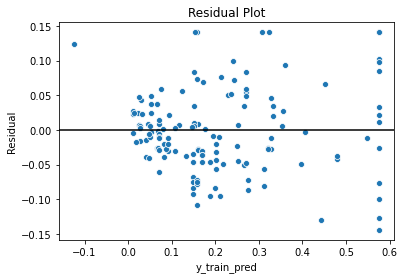

In [116]:
plt.title('Residual Plot')
sns.scatterplot(x=samp_df['y_train_pred'], y= samp_df['Residual'])
plt.axhline(y=0,color='black')

#### Inference
Earlier the outliers had a value of around 0.3 to -0.3 now after treating the outliers the value is arounf 0.15 to -0.15
This shows that the outliers were successfully treated. 